# Logistic Regression classifier

In [1]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
from sklearn.datasets import load_digits

dataset = load_digits()
X, y = dataset.data, dataset.target
for class_name, total_number_in_class in zip(dataset.target_names, np.bincount(dataset.target)):
    print(class_name, total_number_in_class)

0 178
1 182
2 177
3 183
4 181
5 182
6 181
7 179
8 174
9 180


In [2]:
# Produce imbalnce binary class
y_copy = y.copy()
y_copy[y_copy != 1] = 0
for class_name, total_number_in_class in zip(dataset.target_names, np.bincount(y_copy)):
    print(class_name, total_number_in_class)

0 1615
1 182


In [3]:
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X, y_copy, random_state = 0)
clf = LogisticRegression().fit(X_train, y_train)
clf_decision_score = clf.decision_function(X_test)
clf_decision_probability = clf.predict_proba(X_test)
y_score_list = list(zip(y_test[:], clf_decision_score[:]))
y_proba_list = list(zip(y_test[0:10], clf_decision_probability[0:10, :]))
#y_score_list, y_proba_list

C:\Users\u0125384\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


# Precion Recall Curve

<IPython.core.display.Javascript object>


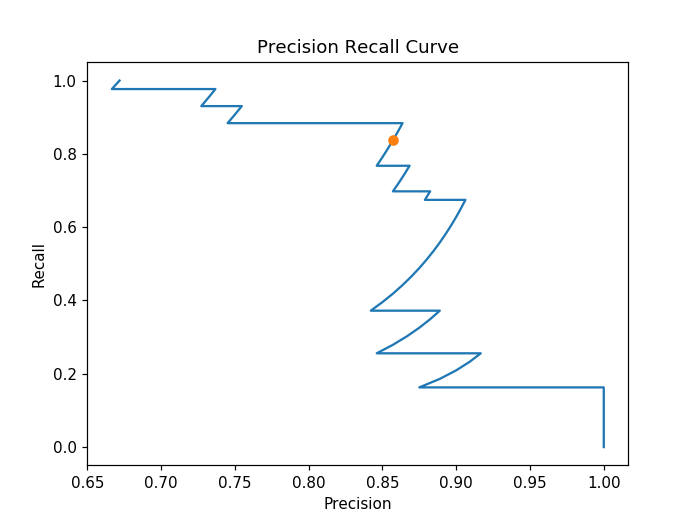

In [4]:
from sklearn.metrics import precision_recall_curve
precision, recall, threshold = precision_recall_curve(y_test, clf_decision_score)
plt.plot(precision, recall)
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precision Recall Curve')
plt.plot(precision[np.argmin(np.abs(threshold))], recall[np.argmin(np.abs(threshold))], 'o')